In [10]:
%matplotlib inline
import numpy as np
import scipy
import matplotlib.pylab as plt

from jupyterthemes import jtplot

jtplot.style(theme='gruvboxd')

# Hledání kořenů funkce $f(x)$ 
Hledáme řešení rovnice $f(x) = 0$ na intervalu $[a,b]$

## Metoda bisekce

### Předpoklady metody

1. Musí existovat hodnoty $a$ a $b$ takové, $F(a)F(b)<0$ a bod $x \in [a,b]$, kde $F(x)=0$
 <img src="./Images/Bisekce.png" alt="Bisekce" align="right"> 

2. Tolerance hledaného řešení $x_{\rm bisection}$

$$
f(x_{\rm bisection}) \leq \varepsilon
$$

### Algoritmus metody
 
 Hledáme nulový bod na intervalu $<a,b>$, který splňuje výše uvedené předpoklady
 

 0. Počáteční nastavení hraničních bodu $a_i = a$, $b_i =b$ pro $i = 0$
 0. Z hraničních bodů intervalu spočítej střední bod vztahem
 
 $$
 c_i = a_i + \frac{b_i-a_i}{2}
 $$
 0. Pokud $f(c_i) < \varepsilon$, pak je $c_i$ odhad hledaného nulového bodu
 0. V opačném případě pokračuj v hledání
 0. Pokud $f(c_i)f(a_i)>0$, pak nové hraniční body jsou $a_i = c_i$, $b_i = b_i$
 0. Pokud $f(c_i)f(a_i)<0$, pak nové hraniční body jsou $a_i = a_i$, $b_i = c_i$
 0. Opakuj kroky od 2.

In [11]:
def fce(x):
    return x**3.0-2.0


def Bisection(f, a, b, Nmax):
    root = False
    epsilon = 0.000001
    # verifying the assumption, f(a).f(b) < 0. step 1.
    if f(a)*f(b) > 0:
        print('Error, f(a) and f(b) should have opposite signs')
        return False

    # Assigning the initial interval border points - step 2.
    ai = a
    bi = b
    # Iterations
    n = 1
    while (not(root) and n <= Nmax):
        # Bisection , middle point step 3.
        c = (ai+bi)/2.0
        # Condition step 4.
        if (abs(f(c)) < epsilon):
            root = True
        if f(c)*f(ai) > 0:
            ai = c
        # Condition B
        elif f(c)*f(ai) < 0:
            bi = c
        # Condition C: repeat the cycle
        n += 1
    # Final result
    return c

Naši metodu si otestujeme na příkladu mocninné funkce

$$
f(x) = x^3-2.0
$$
Hledáme nulové body funkce na intervalu $x\in[0,2]$. Graf funkce 

Root estimate: 1.2599 with tolerance 0.0000


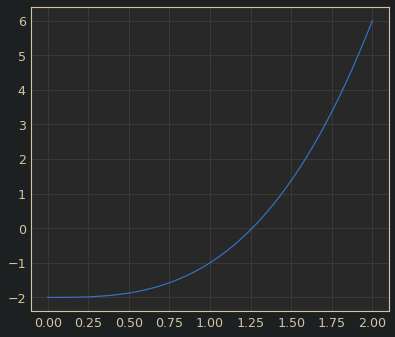

In [12]:
x = np.linspace(0, 2)
plt.plot(x, fce(x))
x = Bisection(fce, 0, 2, 1000)
print('Root estimate: %0.4f with tolerance %.04f' % (x, fce(x)))

### Praktický příklad
V nebeské mechanice při řešení problému dvou těles narazíme záhy na problém řešení Keplerovy rovnice,
<img src="./Images/anomalies.png" alt="Kepler Problem" width="200" height="100" align="right">
$$
M = E - e \sin{E}
$$
která je svou povahou transcendentní. Tato rovnice dává do vzájemné souvislosti vztah mezi střední anomálií $M$, excentrickou anomálii $E$ a excentricitu dráhy $e$. Střední anomálie je dána vztahem
$$
M = \sqrt{\frac{GM}{a^3}}t
$$

Souřadnice obíhajícího tělesa jako funkci času dostaneme ze vztahu
$$
x(t) = a(\cos(E) - \epsilon) \\
y(t) = b \sin{E},
$$
kde $b = a\sqrt{1-\epsilon^2}$ je vedlejší poloosa. Implicitní časová závislost excentrické anomálie najdeme řešením Keplerovy rovnice.

**Problém:**

Satelit obíhá Zemi kolem rovníku po trajektorii s excentricitou $e = 0.5$ po geostacionární dráze s velikostí hlavní poloosy $ a = 35 900 $ km. Určete souřadnice x,y satelitu v 15 minutových intervalech po dobu 5 hodin.

In 0.00 hours, the satellite is located at (17950.00,0.00) km
In 0.25 hours, the satellite is located at (17454.74,5146.43) km
In 0.50 hours, the satellite is located at (16033.12,10023.39) km
In 0.75 hours, the satellite is located at (13848.84,14430.28) km
In 1.00 hours, the satellite is located at (11104.37,18261.72) km
In 1.25 hours, the satellite is located at (7989.45,21493.40) km
In 1.50 hours, the satellite is located at (4657.13,24151.51) km
In 1.75 hours, the satellite is located at (1221.06,26286.13) km
In 2.00 hours, the satellite is located at (-2238.77,27954.88) km
In 2.25 hours, the satellite is located at (-5667.30,29214.02) km
In 2.50 hours, the satellite is located at (-9027.39,30114.74) km
In 2.75 hours, the satellite is located at (-12294.38,30702.08) km
In 3.00 hours, the satellite is located at (-15452.15,31014.97) km
In 3.25 hours, the satellite is located at (-18490.35,31086.79) km
In 3.50 hours, the satellite is located at (-21402.61,30946.20) km
In 3.75 hours,

Text(0, 0.5, '$y$ coordinate [km]')

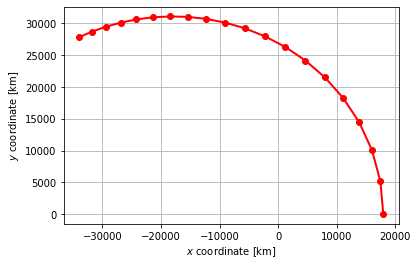

In [4]:
# Parameters
# Eccentricity
eps = 0.5
# Major semi-axis
a = 35900e3
# Gravitational constant
G = 6.67384e-11
# Earth Mass [kg]
Mz = 5.972e24

# Minor semi-axis
b = a*(1-eps**2.0)**0.5

# Constant in relation between Mean Anomaly and Time
const = ((G*Mz)/a**3.0)**0.5

tf = 5.0*3600.0
t0 = 0.
timestep = 15.0*60.

# Kepler equation
def Kepler( E ):
    return E - eps*np.sin(E) - const*t

def coordinates(E):
    x = a*(np.cos(E)-eps)
    y = b*np.sin(E)
    return [x/1.e3, y/1.e3]

times = np.arange(t0, tf, timestep)

position = []

a0 = -10
b0 = 10
Niter = 100

for t in times:
    E = Bisection(Kepler,a0,b0,Niter)
    ri = coordinates(E)
    position.append(ri)
    print('In %0.2f hours, the satellite is located at (%0.2f,%0.2f) km' %(t/3600, ri[0], ri[1]))

position = np.array(position)

# Plotting of the result
plt.plot(position[:,0],position[:,1],"o-",color="red",lw=2)
plt.grid(True)
plt.xlabel("$x$ coordinate [km]")
plt.ylabel("$y$ coordinate [km]")

## Iterace k pevnému bodu
Metoda bisekce je velmi jednoduchá pro implementaci a v mnoha případech je dostačující i přes relativně větší nároky na výpočetní čas. Přesto jsou různé patologické případy, kdy musíme použít jiné alternativní metody. Jednou z nich je následující metoda, jejíchž hlavní výhoda spočívá v tom, že nemusíme znát prohledávaný interval, namísto toho algoritmus sám konverguje požadovanému řešení.

### Algoritmus metody

0. Přepíšeme naši funkci $f(x)$, pro kterou hledáme kořen do tvaru $$f(x)=x-g(x)$$
0. Zvolíme počáteční odhad řešení (hledaného kořenu) $k_1$
0. Budeme cyklicky opakovat následující sekvenci, pokud nebude rozdíl mezi po sobě jdoucími odhady kořene menší než požadovaná přesnost, nebo nepřesáhneme danný počet iterací.
    0. Další zpřesněný odhad řešení dostaneme ze vztahu $$k_{i+1}=g(k_i)$$
    0. Pokud je rozdíl mezi odhadem $k_{i+1}-k_i < \varepsilon$, nebo počet iterací přesáhnul maximální počet povolených ukončíme cyklus.

Vidíme, že hledání kořene dané funkce jsme převedli na hledání pevného bodu funkce

$$
x = g(x).
$$

**Problém: najděte kořen funkce**
$$
f(x) = \frac{x^2-1}{3}
$$

In [5]:
def f(x):
    return (x**2-1.0)/3.0
def g(x):
    return x - f(x)

def iterated_fixed_point(user_func,x_0 = 0.1, epsilon=0.001):
    MAX_ITER = 100
    eps = 10.*epsilon
    n = 0
    x = x_0
    while (eps > epsilon and n < MAX_ITER) :
        x_old = x
        x = user_func(x)
        eps = abs(x_old-x)
        n += 1
        print('%i %0.4f' % (n,x))
    return x

root = iterated_fixed_point(g)
print('Hledaný kořen je: %0.4f' % root)

1 0.4300
2 0.7017
3 0.8709
4 0.9514
5 0.9830
6 0.9942
7 0.9981
8 0.9994
9 0.9998
Hledaný kořen je: 0.9998


### Verhaulsteův diagram  (cobweb graf)

Jedná se o užitečný způsob visualizace dynamického systému reprezentovaného jedno-dimenzionální diskrétní mapou (například logistická mapa). Umožňuje analyzovat vývoj systému po zadání počátečních podmínek a odhalit případné pevné body zobrazení.

**Algoritmus** 

0. Zvol počáteční odhad $x = x_0$.
0. Na ose vyznač bod o souřadnicích $(x,0)$.
0. Z něj nakresli vertikální čáru do bodu $(x,f(x))$.
0. Z tohoto bodu veď horizontální čáru do bodu $(f(x),f(x))$.
0. Pokračujeme vertikální čárou do bodu $(f(x),f(f(x)))$.
0. Body 4 a 5 opakujeme rekurzivně do předem daného počtu iterací.

In [6]:
# Plotting Verhaulst diagram

def get_VH_points( x_ini = 0.1, n = 20):
    x = x_ini
    VH_points = [(x,0)]
    
    for i in range(n):
        y1 = g(x)
        VH_points.append((x,y1))
        VH_points.append((y1,y1))
        y2 = g(y1)
        VH_points.append((y1,y2))
        x = y1
    
    return zip(*VH_points)

def get_functions_points(n_iter=10):
    x_vals = np.linspace(0,1.3,n_iter)
    y_vals = [g(x) for x in x_vals]
    return x_vals, y_vals

def plot_VH(function_n = 1000, VH_n = 10, VH_x = 0.1):
    func_x_vals,func_y_vals = get_functions_points(n_iter=function_n)
    VH_x_vals,VH_y_vals = get_VH_points(x_ini = VH_x, n = VH_n)
    
    fig, ax = plt.subplots(figsize = (6,6))
    diagonal_line = ax.plot((0,1.3), (0,1.3), color='gray', linewidth=1.35)
    function_line = ax.scatter(func_x_vals, func_y_vals, color = 'r', s=1.5)
    VH_line = ax.plot(VH_x_vals,VH_y_vals, color='b', linewidth=1)
    
    ax.set_ylim((0,1.3))
    ax.set_xlim((0,1.3))
    
    plt.show()
    return 

/Users/viktor/.virtualenvs/e-learn/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


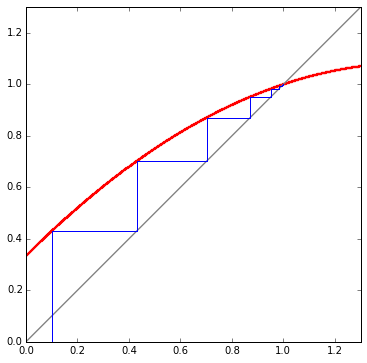

In [7]:
plot_VH()

Matematicky řečeno, diskrétní mapu lze jej formálně zapsat jako

$$
x_{n+1} = f(x_n)
$$

Jak už bylo výše psáno, pomocí diskrétních map lze popsat chování dynamických systémů. Můžeme si představit, že tak dostáváme informaci o systému v ekvidistantních diskrétních časových krocích. V určitých případech můžeme však při aplikaci tohoto způsobu na nelineární diskrétní mapy dostat velmi překvapivý výsledek. Jako vhodný příklad může posloužit [logistická rovnice](https://en.wikipedia.org/wiki/Logistic_map). 

$$
x_{n+1} = r x_{n}(x_{n}-1)
$$
Tato rovnice nám zjednodušeně popisuje vývoj populace, zahrnujíc dva podstatné efekty

* Populace vzrůstá rychleji, čím je větší
* Čím je větší populace, ubývá zdrojů a populace není schopna se uživit

Postup řešení bude stejný jako v předchozím případě, jenom zde ještě do funkce zahrneme jako parameter sílu zpětné vazby $r$. Uvidíme, že velikost tohoto parametru bude pro chování systému klíčové.

In [15]:
# Logistic equation
def logistic_map(x,r):
    return x*r*(1.0-x)

# Calculate points for Verhaulst diagram
def get_VH_points(r, x=0.5, n=100):
    # Points will be stored in tuple
    
    # Initialization and first point 
    VH_points  = [(x,0)]
    for i in range(n):
        y1 = logistic_map(x,r)
        VH_points.append((x,y1))
        VH_points.append((y1,y1))
        y2 = logistic_map(y1,r)
        VH_points.append((y1,y2))
        x = y1
    return zip(*VH_points)

# Calculate y-points from from logistic equation for x in range(0,1)
def get_function_points(r, n =1000):
    x_vals = np.linspace(0,1,n)
    y_vals = [logistic_map(x,r) for x in x_vals]
    return x_vals, y_vals


# Plotting VerhaulsteŮv diagram 
def plot_VH(r, function_n = 1000, VH_n = 100, VH_x = 0.5):
    func_x_vals, func_y_vals = get_function_points(r=r, n=function_n)
    VH_x_vals, VH_y_vals = get_VH_points(r=r, x = VH_x, n = VH_n)
    
    fig, ax = plt.subplots(figsize = (6,6))
    diagonal_line = ax.plot((0,1), (0,1), color='gray', linewidth=1.35)
    function_line = ax.scatter(func_x_vals,func_y_vals, color= 'r', edgecolor='None', s=1.5)
    VH_line = ax.plot(VH_x_vals,VH_y_vals, color='b', linewidth=1)
    
    ax.set_ylim((0,1))
    ax.set_xlim((0,1))
    
    plt.show()

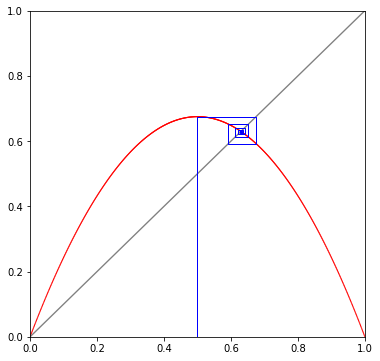

In [16]:
plot_VH(r=2.7)

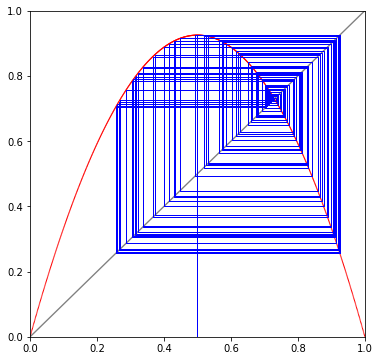

In [17]:
plot_VH(r=3.7)

Jak je patrné z předchozích grafů, v závislosti na parametru $r$ je hledaný pevný bod zobrazení stabilní (první případ) nebo nestabilní (druhý případ), což může vést až k chaotickému chování systému. 

### Úkoly

* Zkuste nalézt další případy nelineárních diskrétních map, vykazující zajimavé až chaotické chování
* Předchozí postup konstrukce Verhaulsteova diagramu zkuste přepracovat do formy interaktvní formy s využitím widgetů

## Iterace v komplexním oboru

Nemůžu si odpustit, když už jsme narazili na iterativní metody, nezmínit se o fraktálních množinách, které lze spatřit při studiu rychlosti konvergence map v komplexním oboru. Jaké muselo být asi překvapení prvních matematických průzkumníků těchto map, když pod jejich pláštíkem matematické rigoróznosti spatřili takřka dokonalý umělecký obraz nekonečné složitosti, rozmanitosti, jedinečnosti obalené estetickou dokonalostí. Zkusme si to také !

Poslouží nám k tomu opět kvadratická mapa, podobně jako v předchozích případech. Tentokrát ji však budeme analyzovat v komplexním oboru. Přesný tvar naší kvadratické mapy je

$$
z_{n+1} = z_n^2 + c
$$

kde $z,c$ jsou komplexní čísla. Otázka zní, pro jaké hodnoty čísla $c$ zůstává absolutní hodnota čísla $z_n$ ohraničena po daný počet iterací $n$. Problém lze znázornit graficky, zkoumanou rozsah velikosti komplexního čísla $c$ si můžeme znázornit čtvercem v komplexní rovině. Pro každý bod z této oblasti určíme, jak rychle diverguje jeho velikost resp. nediverguje po předem daný počet iterací. 

### Algoritmus metody

* Určíme si prohledávanou oblast kompexního čísla $c$. Doporučený rozsah reálné složky $c_{\rm Re} \in (0.22, -0.21)$ a imaginární složky $c_{\rm Im} \in (-0.70, -0.69)$.
* Zvolíme maximální počet iterací $N$ a počáteční hodnotu $z_0$.
* Pro každou hodnotu komplexního čísla $c$ z prohledávané oblasti spočítáme iterativně kvadratickou mapu $z_{n+1}=f(z_n)$ a pokud během iterace velikost komplexního čísla překročí hodnotu $|z_n| > 2$, uložíme si hodnotu iterace $i$. Pokud tuto hodnotu nepřekročí, nebudeme tento bod považovat za divergentní.
* Této hodnotě pak přiřadíme určitou barvu, což nám ve výsledku generuje barevnou mapu pro celou prohledávanou oblast 

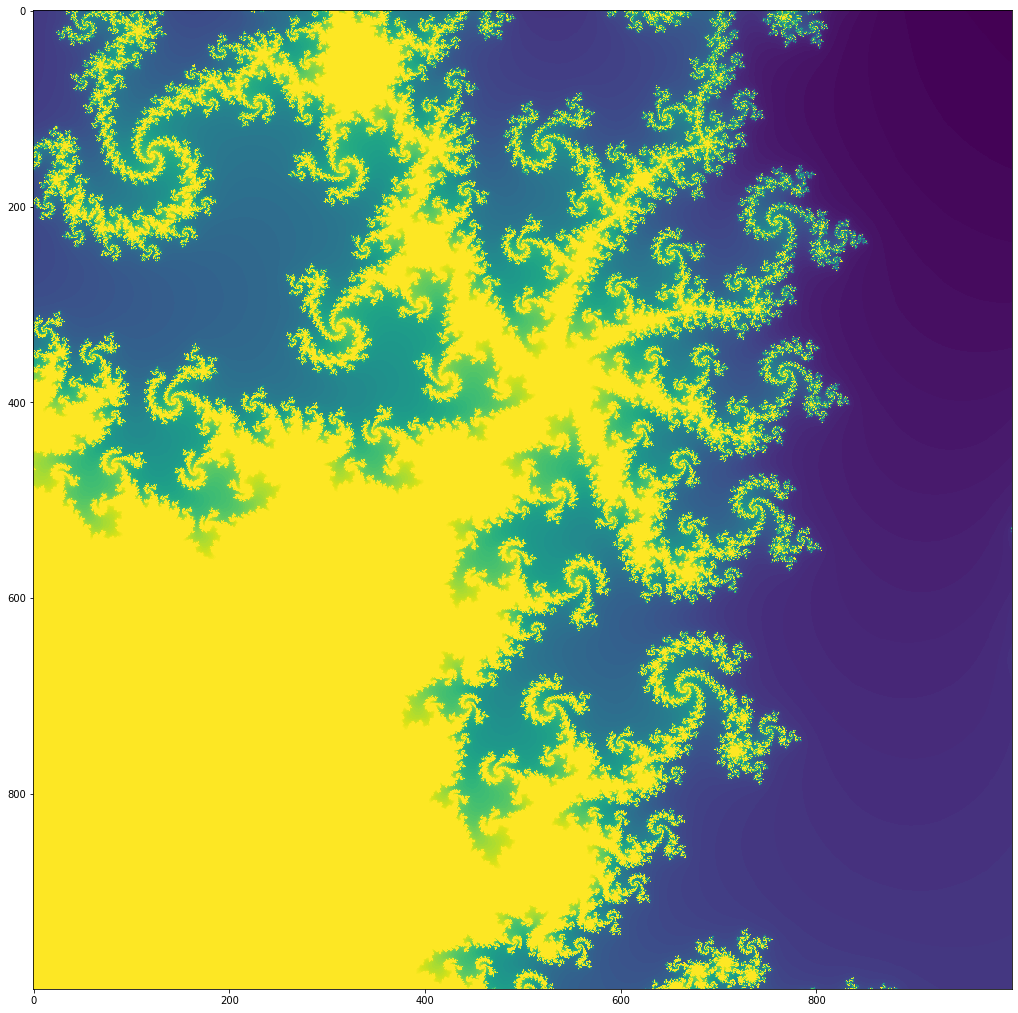

In [20]:
def mandel(c,maxiter):
    
    z = complex(0,0)
    
    for iteration in range(maxiter):
        z = (z*z) + c
        
        if abs(z) > 4:
            break
        
    return iteration

def make_plot(xvalues,yvalues):
    
    xlen = len(xvalues)
    ylen = len(yvalues)
    
    mapa = np.zeros((xlen,ylen))
    
    for ix in range(xlen):
        for iy in range(ylen):
            
            cx = xvalues[ix]
            cy = yvalues[iy]
            
            c = complex(cx, cy)

            mapa[ix,iy] = mandel(c,120)            
    return mapa

# set the location and size of the atlas rectangle
xvalues = np.linspace(-0.22, -0.21, 1000)
yvalues = np.linspace(-0.70, -0.69, 1000)

result = make_plot(xvalues,yvalues)

fig, ax = plt.subplots(figsize=(18, 18))

ax.imshow(result, interpolation="nearest")

Výsledný obraz zobrazuje podivuhodný geometrický obrazec, který v každém bodě obsahuje svoji kopii, je soběpodobný a má neceločíselnou dimenzi. Poprvé spatřil tento fraktál [Mandelbrotova množina](https://en.wikipedia.org/wiki/Mandelbrot_set) světlo světa v roce 1978. Pro své vlastnosti se jim souhrně říká fraktály a velmi úzce souvisí s chaotickými systémy.

### Příklady
* Modifikujte komplexní kvadratickou mapu, rozsah prohledávané oblasti komplexního čísla $c$ a generujte jiné tvary fraktálu.
* Zkuste výpočet optimalizovat a zefektivnit dobu výpočtu, porovnejte si výsledné časy výpočtu
* Vytvořte animaci zoomu výpočetní oblasti fraktální množiny

## Newtonova-Raphsonova metoda
<img src=./Images/Newton_Raphson.png width=300 height=300 align='right'>
Ačkoliv předchozí metoda *Iterace k pevnému bodu* může být mnohem rychlejší než metoda *Bisekce* uvedeme si ještě rychlejší metodu nalezení kořenu funkce. Její princip poměrně snadno pochopíme. 

Máme spojitou a diferencovatelnou funkci definovanou na intervalu $[a,b]$ a $p$ je kořen funkce takový, že $f(p)=0$. Pokud zvolíme počáteční odhad dostatečně blízko k hodnotě $p$, tedy $ |p-p_{\rm ini}| < \varepsilon$, kde $\varepsilon$ je malé číslo, můžeme rozvinout funkci okolo bodu $p$ s pomocí Taylorova rozvoje II. řádu

$$
f(p) = f(p_{\rm ini})+(p-p_{\rm ini})f'(p_{\rm ini})+\frac{(p-p_{\rm ini})^2}{2}f''(p_{\rm ini})+\mathcal{O}^3(|p-p_{\rm ini}|)
$$

jelikož dle zadání $f(p)=0$ a $|p-p_{\rm ini}|^2 \ll \varepsilon$ můžeme vyšší řád zanedbat a dostáváme pro odhad iterativní vztah

$$
p_{i+1} \approx p_{i} - \frac{f(p_i)}{f'(p_i)}
$$

### Algoritmus metody

* Určete derivaci funkce, jejíž kořen hledáme (v případě, že není analyticky zadána, je třeba derivace odhadnout numericky
* Určete počáteční odhad kořene $p_{\rm ini}$ a maximální počet iterací
* Spočítejte další odhady podle výše uvedeného vztahu iterativně dokud není počet iterací větší než povolený, nebo odhad chyby neklesne pod požadovanou úroveň.

In [22]:
def fce(x):
    return x**3.0-2.0

def fcediff(x):
    return 3.0*x**2
    

def Newton_Raphson(f,fdiff,p_in, MAX_ITER, a, b):
    n = 0
    x_n = p_in
    # Precission limit
    h = 0.001 
    
    while ( n < MAX_ITER and f(x_n) > h):
        x_n = x_n - f(x_n)/fdiff(x_n)
        n += 1
    return x_n,n

odhad, iterace = Newton_Raphson(fce,fcediff,1.5,100,0,2)
print('Odhad kořene je: %0.4f odhad po %i iteracích ' % (odhad,iterace))

Odhad kořene je: 1.2599 odhad po 3 iteracích 


### Praktický příklad
<img src='./Images/newtonuv_fraktal.png' align='right'>
Newtonovu-Raphsonovu metodu lze efektivně použít nejen pro hledání kořenů v reálném oboru ale také v komplexním. Pokud použijeme podobný přístup, jako v případě *Iterace k pevnému bodu* a budeme zkoumat rychlost konvergence k danému kořenu v nějaké části komplexního oboru, který si pak podle určené rychlosti konvergence zabarvíme, dostaneme opět nám staré známe fraktální obrazce - *Newtonovy fraktály*.

Zkuste tedy zkonstruovat *Newtonův fraktál* pro polynom třetího stupně

$$
p(z)= z^3-1
$$

Více info [Fraktály s pomocí Newtonovy-Raphsonovy metody](http://www.chiark.greenend.org.uk/~sgtatham/newton/)

# Integrace funkce $\int{f(x)} {\rm d}x$

## Lichoběžníkové pravidlo
<img src='./Images/trapez.png' align='right'></img>
Metoda spočívá v aproximaci určitého integrálu součtem obsahu lichoběžníků,

\begin{equation}
\int_a^b f(x){\rm d}x = \frac{h}{2}\sum_{k=1}^N (f(x_{k+1})+f(x_k)) = \frac{b-a}{2N}\left(f(x_1)+2f(x_2)+2f(x_3)+\dots 2f(x_N)+f(x_{N+1})\right),
\end{equation}

které tvoří na daném intervalu $(a,b)$ sada $N$ ekvidistantních bodů.

### Algoritmus

* Stanovíme počet bodů $N$ na daném intervalu $(a,b)$, v těchto bodech vyčíslíme integrovanou funkci
* Určíme odhad integralu podle vzorce $\frac{b-a}{2N}\left(f(x_1)+2f(x_2)+2f(x_3)+\dots 2f(x_N)+f(x_{N+1})\right)$

In [25]:
def comp_trapezoidal_rule(f, a, b, N=100):
    """Return the approximation of the integral \int_a^b f(x) dx using
    the trapezoidal rule with N subdivisions.
    """
    s = f(a)
    for i in range(1, N):
        # grid i-point 
        x = a + i * (b-a) / float(N)
        # Sum of the rectangle area
        s = s + 2 * f(x)
    s = s + f(b)
    return s * (b-a) / N / 2.

In [26]:
comp_trapezoidal_rule(f=lambda x : x, a=1, b=2)

1.4999999999999998

### Problém

Výzkum a hledání nových exoplanet prožívá v současné době bouřlivý rozvoj. Jedním ze základních úkolů je stanovení jejich základních fyzikálních vlastností. Naneštěstí přímo z pozorování lze většinou stanovit pouze jednu ze základních vlastností, nejčastěji její hmotnost resp. její poloměr. Ostatní vlastnosti musíme určit z modelování jejich vlastností. 

Pokud je známa hmotnost planety, velmi hrubý odhad jejího poloměru můžeme stanovit z předpokladu určitého složení (průměrné hustoty) a rovnoměrného rozložení (ne příliš přesný předpoklad). Například planeta [Gliese 832c](https://en.wikipedia.org/wiki/Gliese_832_c) s hmotností $M=5.40\,M_{Země}$, pokud předpokládáme podobné složení jako má Země, tedy $\rho_{Země}=5520$ $\text{kg.m}^3$, dostáváme $R_{g832c}=(\frac{3M}{4\pi\rho})^{1/3}≈1.75\,R_{Země}$

Tento odhad by platil za předpokladu, že je složení stejné jako Země. Realističtější odhad můžeme dostat použitím předpokládaného profilu hustoty

$$
\rho(r) = \rho_0 \exp{(-rL)}
$$

kde $rho_0$ je hustota ve středu planety a $L$ je charakteristická délka, která závisí na složení. Z numerického modelování vnitřní struktury planet, odhad parametrů pro příklad planety s hmotností $M = 5.40\,M_{Země}$ je zhruba $\rho_0 = 18000$ kg/m3 a $L=6500$ km.

* Integrací přes objem planety a hledáním kořene odhadněte poloměr planety
$$
M(R) = 4\pi \int_0^R R_0 \rho(r) r^2 {\rm d}r 
$$
 a hledáním kořene 
$$
M(R) - M_{\rm observe} = 0
$$
 odhadněte poloměr planety.